Model Free RL

мы отказываемся от идеи того что мы знаем каковы вероятности переходов, не знаем какая будет награда.

Совершаем действия, накапливаем опыт, обучаемся на этом.

**Для простоты** мы предполагаем что у нас множество конечных состояний и каждая троектория в итоге попадает в это множество.
- $\mathcal{S}$ - is a <span style="color:red">finate ($|\mathcal{S}|=n$)</span> state space
- **$\mathcal{S}_F$ - is a set of final states**
- $\mathcal{A}$ - is a <span style="color:red">finate ($|\mathcal{A}|=m$)</span> action space
- $\mathcal{P}$ is an <span style="color:red">uknown</span> transition probability function
$$\mathcal{P}(s`|s,a)=\mathbb{P}[S_{t+1}=s'|S_t=s,A_t=a]$$
- $\mathcal{P_0}$ is an <span style="color:red">uknown</span> initial state probability function
- $\mathcal{R}$ is an <span style="color:red">uknown</span> reward function
$$\mathcal{R}(s,a)=\mathcal{R}_t\Leftrightarrow\mathbb{P}[R_{t}|S_t=s,A_t=a]=1$$
- $\gamma\in[0,1]$ is a discount coefficient


Заметка. - $\mathcal{S}_F$ - это расширение MDP, это расширение вводит финальное состоянее.
Если агент попадает в это состояние - то наш процесс управления/участие в процессе - заканчивается или начинается с начала. 

Цель агента, конечная сумма наград, если мы попали в сотояние конечных_состояний, то сумма получается конечная.
$$G=\sum_{t=0}^{T}\gamma^tR_t, \text{ if } S_t\in\mathcal{S}_F$$

А с другой стороны если ни разу не попадаем в множество конечных состояний в нашем процессе, то сумма остает быть бесконечной. 
$$G=\sum_{t=0}^{\infty}\gamma^tR_t, \text{ if } S_t\notin\mathcal{S}_F$$


Постановка с без конечного состояния считается **общей**, но постановка с конечным множеством эквивалентна общей, если ее конечное множество пустое:\
$$\text{MDP}\left<\mathcal{S},\mathcal{A},\mathcal{P},\mathcal{P}_0,\mathcal{R},\gamma\right>\equiv\text{MDP}\left<\mathcal{S},\mathcal{S}_f,\mathcal{A},\mathcal{P},\mathcal{P}_0,\mathcal{R},\gamma\right>, \text{ if } \mathcal{S}_f=\varnothing$$

# Policy Iteration

Что мешает использовать Policy Iteration в этой новой постановке?

1. мы не знаем reward,
2. не знаем вероятности перехода $\mathcal{P}(s,a,s')$, 
3. соотв мы не можем вычислить ценность состояния.
4. А раз нет ценности состояния $v(s)$ то мы не сможшеь высчитать Ценнсоть-Действия-из-Состояния $q(s,a)$.

Если мы каким-то чудом можем посчитать Q то мы сможем использовать Policy Imporvement шаг

Рассмотрим <span style='color:red'>детерменичтическую</span> троекторию ? Что-бы было проще посчитать $q(s,a)$

- Set $\pi$
- Agent starts from an intial state $S_0$
- acts $A_0=\pi(S_0)\;\;$ <span style='color:blue'>$q_\pi(S_0,A_0)=G(\tau)$</span>
- gets a reward $R_0$ and goes to a next states $S_1$
- acts $A_1=\pi(S_1)\;\;$
- $\dots$
- acts $A_{T-2}=\pi(S_{T-2})\;\;$ <span style='color:blue'>$q_\pi(S_{T-1},A_{T-1})=R_{T-2}+\gamma^1R_{T-1}$</span>(*)
- gets a reward $R_{T-2}$ and goes to a next states $S_{T-1}$
- acts $A_1=\pi(S_{T-1})\;\;$ <span style='color:blue'>$q_\pi(S_{T-1},A_{T-1})=\gamma^0R_{T-1}=R_{T-1}$</span> (**)
- gets a reward $R_{T-1}$ and goes to a next states $S_T\in\mathcal{S}_F$
- $\tau=\{S_0,A_0,S_1,A_1,\dots,S_T\}$ $G(\tau)=\sum_{t=0}^{T-1}{\gamma^tR_t}$

удобнее ввести след. величину <span style='color:green'>$G_t=\sum_{k=t}^{T-1}{\gamma^{k-t}R_t}$</span>.\
Соотв. $G(\tau)\equiv G_0=\gamma^0R_0+\gamma^1R_1+\gamma^2R_2\dots\gamma^{T-1}R_{T-1}$ \
или $q_\pi(S_{T-1},A_{T-1})=G_{T-1}=\gamma^{(T-1)-(T-1)}R_{T-1}$ 


\* $q_\pi(S_{T-2},A_{T-2})$ - это значит мы вычислили $q$ для троектории которая начинается с $S_{T-2}$ и $A_{T-2}$ и выстроили траекторию $\tau=\{S_{T-2}, A_{T-2},S_{T-1}, A_{T-1},S_{T}\}$ и соотв. $G(\tau)=\gamma^0R_{T-2}+\gamma^1R_{T-1} =R_{T-2}+\gamma^1R_{T-1}$

\** $q_\pi(S_{T-1},A_{T-1})$ - это значит мы вычислили $q$ для троектории которая начинается с $S_{T-1}$ и $A_{T-1}$ и выстроили траекторию $\tau=\{S_{T-1}, A_{T-1},S_{T}\}$ и соотв. $G(\tau)=\gamma^0R_{T-1}=R_{T-1}$


Таким образом нам удобно считать $q_\pi(S_m,A_m) = G_m$

обновим подсчет траектории:
- Set $\pi$
- Agent starts from an intial state $S_0$
- acts $A_0=\pi(S_0)\;\;$ <span style='color:blue'>$q_\pi(S_0,A_0)$</span>=<span style='color:green'>$G_0$</span>
- gets a reward $R_0$ and goes to a next states $S_1$
- acts $A_1=\pi(S_1)\;\;$ <span style='color:blue'>$q_\pi(S_1,A_1)$</span>=<span style='color:green'>$G_1$</span>
- $\dots$
- acts $A_{T-2}=\pi(S_{T-2})\;\;$ <span style='color:blue'>$q_\pi(S_{T-2},A_{T-2})=$</span><span style='color:green'>$G_{T-2}$</span>
- gets a reward $R_{T-2}$ and goes to a next states $S_{T-1}$
- acts $A_1=\pi(S_{T-1})\;\;$  <span style='color:blue'>$q_\pi(S_{T-1},A_{T-1})=$</span><span style='color:green'>$G_{T-1}$</span>
- gets a reward $R_{T-1}$ and goes to a next states $S_T\in\mathcal{S}_F$
- $\tau=\{S_0,A_0,S_1,A_1,\dots,S_T\}$ <span style='color:green'>$G_t=\sum_{k=t}^{T-1}{\gamma^{k-t}R_t}$</span>



Получается в случае Дет. траекторий - все мы решили. Но в общем случае - все не так просто.

Рассмотрим <span style='color:red'>Общий случай</span>. Что-бы было проще посчитать $q(s,a)$

- Set $\pi(a|s)$. Initialize <span style='color:blue'>$W(s,a)=0$</span> and <span style='color:blue'>$N(s,a)=0$</span>
- Agent starts from an intial state $S_0$
- acts $A_0~\pi(\cdot{}|S_0)\;\;$\
<span style='color:blue'>$W(S_0,A_0)\leftarrow W(S_0,A_0)+G_0, N(S_0,A_0)\leftarrow N(S_0,A_0)+1$\
$Q(S_0,A_0)\leftarrow W(S_0,A_0)/N(S_0,A_0)$</span>
- gets a reward $R_0$ and goes to a next states $S_1$
- acts $A_1~\pi(\cdot|S_1)\;\;$\
<span style='color:blue'>$W(S_1,A_1)\leftarrow W(S_1,A_1)+G_1, N(S_1,A_1)\leftarrow N(S_1,A_1)+1$\
$Q(S_1,A_1)\leftarrow W(S_1,A_1)/N(S_1,A_1)$</span>

- $\dots$
- acts $A_{T-1}=~\pi(\cdot|S_{T-1})\;\;$ \
<span style='color:blue'>$W(S_{T-1},A_{T-1})\leftarrow W(S_{T-1},A_{T-1})+G_{T-1}, N(S_{T-1},A_{T-1})\leftarrow N(S_{T-1},A_{T-1})+1$\
$Q(S_{T-1},A_{T-1})\leftarrow W(S_{T-1},A_{T-1})/N(S_{T-1},A_{T-1})$</span>

- gets a reward $R_{T-1}$ and goes to a next states $S_T\in\mathcal{S}_F$
- $\tau=\{S_0,A_0,S_1,A_1,\dots,S_T\}$ $G(\tau)=\sum_{t=0}^{T-1}{\gamma^tR_t}$

to find $q_{\pi}(s,a)=\mathbb{E}_\pi[G|S_0=s,A_0=a]$<span style='color:blue'>$\approx Q(s,a)$</span>

Добавляем - матрицу действия W и матрицу количества действий.
$W(S_0,A_0)=W(S_0,A_0)+G_0, N(S_0,A_0)=N(S_0,A_0)+1$\
$Q(S_0,A_0)=W(S_0,A_0)/N(S_0,A_0)$

удобнее ввести след. величину <span style='color:blue'>$G_t=\sum_{t=t}^{T-1}{\gamma^{k-t}R_t}$</span>

\* $q_\pi(S_{T-2},A_{T-2})$ - это значит мы вычислили $q$ для троектории которая начинается с $S_{T-2}$ и $A_{T-2}$ и выстроили траекторию $\tau=\{S_{T-2}, A_{T-2},S_{T-1}, A_{T-1},S_{T}\}$ и соотв. $G(\tau)=\gamma^0R_{T-2}+\gamma^1R_{T-1} =R_{T-2}+\gamma^1R_{T-1}$

\** $q_\pi(S_{T-1},A_{T-1})$ - это значит мы вычислили $q$ для троектории которая начинается с $S_{T-1}$ и $A_{T-1}$ и выстроили траекторию $\tau=\{S_{T-1}, A_{T-1},S_{T}\}$ и соотв. $G(\tau)=\gamma^0R_{T-1}=R_{T-1}$



Как упростить формулу Q ?
Если рассмотреть формулу для следующего члена т.е. $N+1$, то можно в этой формуле выделить рекурентность.

$$Q_{N+1}=\frac{1}{N+1}\sum_{i=1}^{N+1}w_i=\frac{1}{N+1}\left(\sum_{i=1}^{N}w_i+w_{N+1}\right)$$
$$=\frac{1}{N+1}(NQ_N+w_{N+1})=Q_N+\frac{1}{N+1}\left(w_{N+1}-Q_N\right)$$
$$Q_{N+1}=Q_N+\frac{1}{N+1}\left(w_{N+1}-Q_N\right)$$

Обновим Алгоритм

- Set $\pi(a|s)$. Initialize <span style='color:blue'>$W(s,a)=0$</span> and <span style='color:blue'>$N(s,a)=0$</span>
- Agent starts from an intial state $S_0$
- acts $A_0~\pi(\cdot{}|S_0)\;\;$\
<span style='color:blue'>$Q(S_0,A_0)\leftarrow Q(S_0,A_0)+\frac{1}{N(S_0,A_0)+1}\left(G_0- Q(S_0,A_0)\right)$,\
$N(S_0,A_0)\leftarrow N(S_0,A_0)+1$</span>
- gets a reward $R_0$ and goes to a next states $S_1$
- acts $A_1~\pi(\cdot|S_1)\;\;$\
<span style='color:blue'>$Q(S_1,A_1)\leftarrow Q(S_1,A_1)+\frac{1}{N(S_1,A_1)+1}\left(G_1-Q(S_1,A_1)\right)$,\
$N(S_1,A_1)\leftarrow N(S_1,A_1)+1$</span>

- $\dots$
- acts $A_{T-1}=~\pi(\cdot|S_{T-1})\;\;$ \
<span style='color:blue'>$Q(S_{T-1},A_{T-1})\leftarrow Q(S_{T-1},A_{T-1})+\frac{1}{N(S_{T-1},A_{T-1})+1}\left(G_{T-1}-Q(S_{T-1},A_{T-1})\right)$,\
    $N(S_{T-1},A_{T-1})\leftarrow N(S_{T-1},A_{T-1})+1$</span>
    
- gets a reward $R_{T-1}$ and goes to a next states $S_T\in\mathcal{S}_F$
- $\tau=\{S_0,A_0,S_1,A_1,\dots,S_T\}$ $G(\tau)=\sum_{t=0}^{T-1}{\gamma^tR_t}$


### Monte-Carlo - Policy Evaluation
Let $\pi$ be fixed. Set $Q(s,a)=0$ and $N(s,a)=0$.\
For each $k\in\overline{1,K}$, do
- According to $\pi$, get a trajectory $\tau=(S_0,A_0,\dots,S_T)$ and rewards $(R_0,\dots,R_{T-1})$. Define $(G_0,\dots,G_{T-1})$
- For each $t\in\overline{0,T-1}$,update $Q$ and $N$:\
$$Q(S_t,A_t)\leftarrow Q(S_t,A_t)+\frac{1}{N(S_t,A_t)+1}\left(G_t- Q(S_t,A_t)\right),$$\
$$N(S_t,A_t)\leftarrow N(S_t,A_t)+1$$
Ожидаем что если K достаточно большое, то в пределе мы получим нечто близкое к истенному значениею функции $q_\pi$
$$Q(s,a)\approx q_\pi(s,a)$$

### Algorithm:
Let $\pi^0$ - это начальный полиси and $K>0$. $%invisible$
$%https://www.overleaf.com/learn/latex/Mathematical_fonts$
For each $k \in \overline{1,K}$,do

-  <span style='color:blue'>(Policy Evaluation)</span> Monte-Carlo Policy Evaluation.\
Obtain $Q^k(s,a)\approx q_{\pi^k}(s,a)$

-  <span style='color:blue'>(Policy improvement)</span> Greedy Policy Imporvement

$$\pi^{k+1}(a|s) = \begin{cases}
1, \text{if } a \in \text{argmax}_{a'\in\mathcal{A}}Q^k(s,a')\\
0, \text{otherwise}
\end{cases}$$



## Почему это не будет работать?
Потому что в процессе подсчета $Q$ - мы могли не посетить все состояния. а во втором шаге Policy Imporvement мы соотв делаем нашу политику - детерминированной, и мы точно ничего другого не посетим. \
А может быть и так что из-за неудочной инициализации мы не будет попадают в какието состояния.

Как это решить? 
- надо что-то добавить чтобы небыло 0

$$\pi^{k+1}(a|s) = \begin{cases}
1-\varepsilon+\varepsilon/m, \text{if } a \in \text{argmax}_{a'\in\mathcal{A}}Q^k(s,a')\\
\varepsilon/m, \text{otherwise}
\end{cases}$$

## Policy Improvment Theorem
аналичная теорем но с 
Let $Q(s,a)$ be defined.\
Let $\pi=\text{$\varepsilon$-greedy}(Q)$ and $\pi'=\text{$\varepsilon$-greedy}(q_\pi)$\
Then $\pi'\ge\pi\;\;(v_{\pi'}(s)\ge v_pi(s),\forall{s})$

Пусть политики является Епсилон-Жадноя в силу Ку, и политика пи-штрих Епсилон-Жадная в силку Ку пи.
Тогда Политика пи-Штрих всегда будет не хуже чем политика Пи.
Соотв мы определяем "не хуже" как  определяется частичный порядок 

$$

$%https://www.overleaf.com/learn/latex/Mathematical_fonts$
### итого -  Algorithm:
Let $\pi^0$ - это начальный полиси and $K>0, \varepsilon=1$.\
For each $k \in \overline{1,K}$,do

- (Policy Evaluation) Monte-Carlo Policy Evaluation.\
Obtain $Q^k(s,a)\approx q_{\pi^k}(s,a)$

- (Policy improvement) $\text{$\varepsilon$-greedy}$ Policy Imporvement\
obtain$\pi^{k+1}$ by $Q^k$. Define $\varepsilon=1/k$


Переметр $\varepsilon$ принято в начале приравнивать 1. И уменьшать по мере итерирования и сводится к нулю.

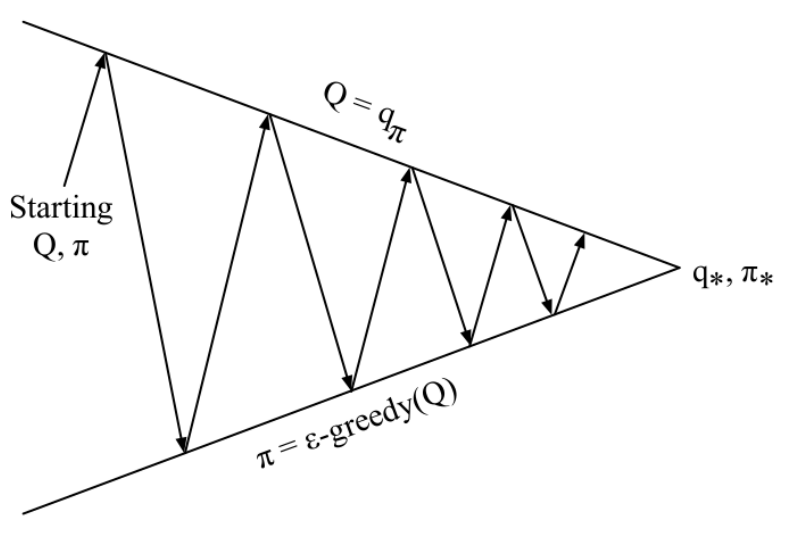

## Обновленный
### Monte-Carlo - Policy Evaluation
Let $\pi$ be fixed. Set $Q(s,a)=0$, $N(s,a)=0$ and $\varepsilon=1$\
For each $k\in\overline{1,K}$, do
- According to $\pi=\text{$\varepsilon$-greedy}(Q)$(*), get a trajectory $\tau=(S_0,A_0,\dots,S_T)$ and rewards $(R_0,\dots,R_{T-1})$. Define $(G_0,\dots,G_{T-1})$
- For each $t\in\overline{0,T-1}$,update $Q$ and $N$:\
$$Q(S_t,A_t)\leftarrow Q(S_t,A_t)+\frac{1}{N(S_t,A_t)+1}\left(G_t- Q(S_t,A_t)\right),$$\
$$N(S_t,A_t)\leftarrow N(S_t,A_t)+1$$
Denife $\varepsilon=1/K$


\* - это и есть policy imporvement шаг, выбор полиси по новой Q

Теорема

$$Q^k\rightarrow q_*\text{ and }\pi^k\rightarrow\pi_*\text{ as }k\rightarrow\infty$$


Суть eпсилон-жадной чтобы мы на начальной стадии обучения посетили как можно больше состояний и совершили как можно больше разнообразных действий, чтобы статистика по нашей функции ку было наиболее полной, чтобы мы охватили как можно больше состояний-действий


![q_epsilon_greedy2.png](q_epsilon_greedy2.png)

Ну мы на прошлой лекции рассматривали принцип динамического программирования и уравнение belmana и у нас были уравнения для функции Q и возникает идея А почему бы не искать Q не просто накапливанием статистики А как ты использовать уравнение биомана Несмотря на то что мы как бы не знаем его мы не можем им пользоваться напрямую но может быть мы можем что-то придумать похоже на уровне белмана и как-то использовать вот принцип динамического программирования.

![bemlan-temporal-difference1.png](bemlan-temporal-difference1.png)

Мы не можешм посчитать R P./

Но если наша среда <span style='color:blue'>детерминированна</span>, то у нас нет мат ожидания, а значт вдоль все троетории мы знаем награду и ку-стостония-дейтвия. тогда мы можешм использовать уравнение белмана
![bemlan-temporal-difference2.png](bemlan-temporal-difference2.png)


Мы сдвигаем в сторону "не вязки"/"на одинаковости" правых и левых частей уравнения.
правой части $R_t+\gamma Q(S_{t+1},A_{t+1})$ и левой части $Q(S_t,A_t)$

тоесть правая часть не равна левой части, и их разница дает нам какоето число. \
это число мы умножаем на $\alpha$ learning rate. со времинем - это разница - будет сходится к нулю. то это значит что это процедура стабилизировалась. и это процедура приводит к решению уравнения Белмана.



В общем случае (не детерминированной среде), мы ничего не меняем в этой процедуре, и поступаем точно также. При этом мы рассуждаем след. образом. \
В состоянии $S_t$ и действии $A_t$ мы побываем не один раз и в среднем добавляя к Q величины с коефициентом Q таким образом, мы возможно в итоге и наберем такое мат ожидание. 

Пример у нас есть MDP, и разные траектории, какоие будет состояния в MC и TD Policy Evaluation
![compare-MC-TD.png](compare-MC-TD.png)

### MC
**V(B)=6/8=3/4** потому что у нас всего 8 траекторий с B\
**V(A)=0** потому что у нас всего 1 траетория с A
### TD
**V(B)=3/4**\
**V(A)=3/4**

У нас один раз реализовалось траектория {A,0,B,0} и после состояния A идет состояние B. а второй факт что из B мы в среднем получим награду 3/4, соотв из А мы тоже получим состояние 3/4. Получается в TD мы учитывается, то как из какого состояния куда мы переходим.\
А в подходе MC мы тупо набираем статистику, под состояниям и никак не учитываем что из состояния A мы переходим в состояние B, как будто они совершенны независимы. Это есть принципиальная разница между подходами.\
TD он оперирует с принципом динамического программирования, который ухватывает переходы между состояниями, и статитику этих переходов. В данному случай статика у нас получалась 100%, мы из состояния A всегда в данном случаем перешли в состояние B. А дальше на B есть некоторая статистика и она переносим в состояние А.

# Temporal-Difference Policy Evaluation
Как оценивается политика в силу алгоритма

Let $\pi$ be fixed. Set $Q(s,a)=0$.\
 For each $k\in\overline{1,K}$, do
_Получаем траекторию согласно политике_
- According to $\pi$ get a trajectory\
$\tau=(S_0,A_0,\dots,S_T)$ and rewards $(R_0,\dots,R_{T-1})$.

_проходимся по полученной траектории и обновляем функцю Ку в соотв с формулой, похожей на формулу белмана._
- For each $t\in\overline{0,T-1}$,update $Q$:\
$$Q(S_t,A_t)\leftarrow Q(S_t,A_t)+\alpha(R_t+\gamma Q(S_{t+1},A_{t+1})-Q(S_t,A_t))$$


Если $К$ достаточно большое число, то функция $Q(S,A)$ будет близок к $q_\pi(s,a)
$$Q(s,a)\approx q_\pi(s,a)$$


Чтобы сделать алгоритм более оптимальным, мы можем обрать внимание на то что во втором шаге, мы не пользуемся формулой целиком, в отличии от подхода Монте Крало. 

Если посмотреть на формулу $Q(S_t,A_t)$ то мы видимо что все что нам для ее реализации это $S_t,A_t,R_t,S_{t+1},A_{t+1}$. тоесть нам больше ничего не нужно из среды для определения Q.

Возникает идея - а давайте не ждать конца траектории, а сразу обновлять функцию $Q(s,a)$ при прохождении по траектории.

# SARSA Learning with TD PE


Let $Q(s,a)=0$, K>0, and $\epsilon=1$\
For each $k\in \overline{1,K}$, do (для каждого шага)
During trajectory\
- From the state $S_t$, acting $A_t\sim\pi(\cdot|S_t)$,\
where $\pi=\text{$\varepsilon$-greedy}(Q)$, get $R_t$, go to the next state $S_{t+1}$, and act $A_{t+1}\sim\pi(\cdot|S_{t+1})$
- According to $(S_t,A_t,R_t,S_{t+1},A_{t+1})$, update Q:
$$Q(S_t,A_t)\leftarrow Q(S_t,A_t)+\alpha(R_t+\gamma Q(S_{t+1},A_{t+1})-Q(S_t,A_t))$$

Put $\varepsilon=1/k$

### Theorem
$Q^k\leftarrow q_* \text{ and } \pi^k\leftarrow\pi_*\text{ as }k\leftarrow\infty$


Стоит отметить - не смотря на то что мы рассматривал задачи и предполагали, что каждая траетория будет конечная, то вообще говоря, и для монтекарло это принципиально - потому чтол мы должны дойти до конца и считать Ж. то для данного подхода, это не принципиально, то троаетория может быть бесконечна. Мы запускаем агента, он взаимодействует со средой, накапливает опыт, тут же обновляет Ку функции, туту же взаимодейтсвует со средой на основе этой функции. В принципе в данном подходе, троектория может быть бесконечной. Это плюс этого лагоритма. А также он быстрее работает чем предыдущий подход.

### Using Bellman Optimality Equation

Мы очень сильно экслуатировали идет Policy Iteratoin который был в уравнении Белмана Expectation Quation. Но мы еще рассмотрим идею Value Iteration. Когда мы рассматриваем уравнениеи оптимальности, для $q^*$.

Давайте перенесем эту идею на тот случай когда P и R не известно, но руководствоваясь теми-же самыми соображениями.


Bellman Optimality Equation for $q_*$

$q_*(s,a)=\mathcal{R}(s,a)+\gamma\sum{s'}\mathcal{P}(s'|s,a)\max_{a'}q_*(s',a')$

Перешпием ее в термина мат. ожидания.

$q_*(s,a)=\mathbb{E}\left[R_t+\gamma\max_{a'}q_*(S_{t+1},a')|S_t=s,A_t=a\right]$


**Q-Learning**
$$Q(S_t,A_t)\leftarrow Q(S_t,A_t)+\alpha(R_t+\gamma \max_{a'}Q(S_{t+1},a')-Q(S_t,A_t))$$

**заметка** в этом части уравнения $\max_{a'}Q(S_{t+1},a')$ мы пишем $a'$, а не $A_t$ как мы обычно писали до этого, потому что, в функции $\max$ мы итерируем по всем возможным действиям.

И таким образом мы получили **Q-Learnin алгоритм**

Let $Q(s,a)=0$, K>0, and $\epsilon=1$\
For each $k\in \overline{1,K}$, do (для каждого шага)
During trajectory\
- From the state $S_t$, acting $A_t\sim\pi(\cdot|S_t)$,\
where $\pi=\text{$\varepsilon$-greedy}(Q)$, get $R_t$, go to the next state $S_{t+1}$, and act $A_{t+1}\sim\pi(\cdot|S_{t+1})$
- According to $(S_t,A_t,R_t,S_{t+1})$, update Q:
$$Q(S_t,A_t)\leftarrow Q(S_t,A_t)+\alpha(R_t+\gamma \max_{a'}Q(S_{t+1},a')-Q(S_t,A_t))$$

Put $\varepsilon=1/k$

### Theorem
$Q^k\leftarrow q_* \text{ and } \pi^k\leftarrow\pi_*\text{ as }k\leftarrow\infty$


Плюсы и минусы Q-Learning и SARSA

![compareSARSAandQL.png](compareSARSAandQL.png)

Почему Q-Learning идет вдоль обрыва?

Потому что Q-Learning он сразу ищет оптимальную функцию $q_*$, и он не зависимо по какой политике мы действуем, потому что он решает уравнения оптимальности Белмана. Тоесть $\pi=\text{$\varepsilon$-greedy}(Q)$ может быть какой угодно, в данном случаее это не важно, потому что так устроен QL. Если взять $\varepsilon=1$ и политика будет равномерная, QL все равно будет искать оптимальную $q$ функцию, не зависимо от того какая была политика.
Поэтому он находит функцию Q которая говорит что оптимально нужно идти вдоль обрыва, но при этом мы действуем в силу $\pi=\text{$\varepsilon$-greedy}(Q)$, поэтому есть вероятность не жадным образом, в силу ку функции, а с некоторй вероятностью либо вверх либо вниз, поэтому он сваливается часто.

А SARSA он устроен подругому, у  него есть текущаа политика, и он ище ку именно для этой текущей политки. И получается так что он осознает, что если текущая политика эпсилон-жадная, с некоторой вероятностью она совершает не правильные (не жадные шаги), поэто эта политика должна быть какой-то другой, она не должна идти вдоль обрыва, нужно страховаться на эту политику, и таким образом получается такой результат, таким образом SARSA лучше.

Понятно что если мы епсилон будем устремлять к нулю, то SARSA потихоньку будет смещаться к оптимальной движению вдоль обрыва. И QL в общчении свою функцию улучшит, потому, что с меньшей вероятностью вероятностью будет сваливаться в обрыв.

В конце концов они сойдутся к одному значению. На практику увидим :-)

_Q-Policy Iteration_$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$_SARSA_

$Q(s,a)\leftarrow\mathbb{E}[R+\gamma Q(S',A')|s,a]\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$$Q(S,A)\leftarrow^{\alpha}R+\gamma Q(S',A')$

_Q-Value Iteration_ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$_Q-Learning_

$Q(s,a)\leftarrow\mathbb{E}\left[R+\gamma \max_{a'\in\mathcal{A}}Q(S',A')|s,a\right]\;\;\;\;$$Q(s,a)\leftarrow^{\alpha}R+\gamma \max_{a'\in\mathcal{A}}Q(S',A')|$



Q-Policy Iteration - в нем мы использовали уравнение bellman expectation equation
Для  Q-Value Iteration - мы использовали оптимальное уровнение
SARSA - это наследник от Q-Policy Iteration
а Q-Learning наследник от Q-Value Iteration
в тех случаях когда мы не знаем фкции перехода м\у состояниями и функцию перехода.


А Monte Carlo вообще не использует принцип динамического программирования, это просто набор статистики